In [1]:
import pandas as pd
athletes = pd.read_csv('./pandas/athletes.csv')
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11543 entries, 0 to 11542
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11543 non-null  int64  
 1   nationality  11543 non-null  object 
 2   sex          11543 non-null  object 
 3   height       11213 non-null  float64
 4   weight       10884 non-null  float64
 5   sport        11543 non-null  object 
 6   gold         11543 non-null  object 
 7   silver       11543 non-null  object 
 8   bronze       11543 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 811.7+ KB


<AxesSubplot:xlabel='height', ylabel='weight'>

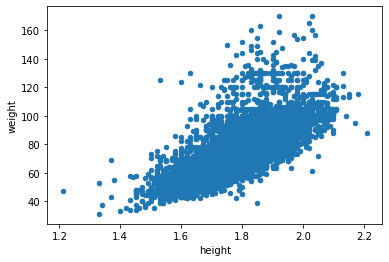

In [3]:
%matplotlib inline
athletes.plot.scatter(x='height', y='weight')


In [4]:
athletes.head(20)

,id,nationality,sex,height,weight,sport,gold,silver,bronze
0,736041664,ESP,male,1.72,64.0,athletics,0,0,0
1,532037425,KOR,female,1.68,56.0,fencing,0,0,0
2,435962603,CAN,male,1.98,79.0,athletics,0,0,1
3,521041435,MDA,male,1.83,80.0,taekwondo,0,0,0
4,33922579,NZL,male,1.81,71.0,cycling,0,0,0
5,173071782,AUS,male,1.80,67.0,triathlon,0,0,0
6,266237702,USA,male,2.05,98.0,volleyball,0,0,1
7,382571888,AUS,male,1.93,100.0,aquatics,0,0,0
8,87689776,ESP,female,1.80,62.0,athletics,0,0,0
9,997877719,ETH,female,1.65,54.0,athletics,0,0,0


<AxesSubplot:>

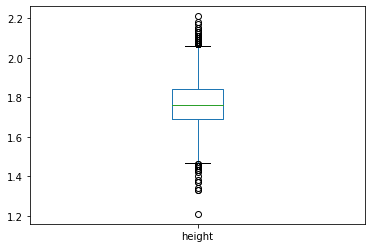

In [5]:
heights = athletes['height']
heights.plot.box()

In [6]:
q1 = heights.quantile(0.25)
q3= heights.quantile(0.75)
iqr = q3 - q1
pmin = q1 - 1.5* iqr
pmax= q3 + 1.5 * iqr

In [9]:
#nwh = heights[heights.between(pmin, pmax)]  #do not change the original data, try to not throw away anything at first ///you will change the medal count info if you throw away entire rows
nwh = heights.where(heights.between(pmin, pmax))  #this will replace everything that is not between the range with NaN


,before,after
count,11213.000000,11121.000000
mean,1.766294,1.765098
std,0.112702,0.108867
min,1.210000,1.470000
25%,1.690000,1.690000
50%,1.760000,1.760000
75%,1.840000,1.840000
max,2.210000,2.060000


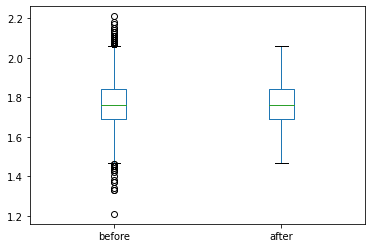

In [13]:
compare = pd.DataFrame({'before': heights, 'after': nwh}) #results in a tighter std deviation
compare.plot.box()
compare.describe()

In [15]:
heights.where(heights.between(pmin, pmax), inplace=True)

<AxesSubplot:xlabel='height', ylabel='weight'>

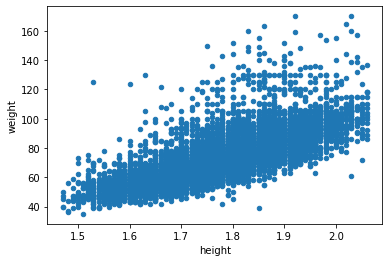

In [16]:
athletes.plot.scatter(x='height', y='weight')

In [25]:
heights.loc[0]


1.98

In [26]:
athletes

,id,nationality,sex,height,weight,sport,gold,silver,bronze
0,736041664,ESP,male,1.98,64.0,athletics,0,0,0
1,532037425,KOR,female,1.68,56.0,fencing,0,0,0
2,435962603,CAN,male,1.98,79.0,athletics,0,0,1
3,521041435,MDA,male,1.83,80.0,taekwondo,0,0,0
4,33922579,NZL,male,1.81,71.0,cycling,0,0,0
...,...,...,...,...,...,...,...,...,...
11538,265605954,CUB,female,1.64,58.0,athletics,0,0,0
11539,214461847,CZE,female,1.73,63.0,athletics,0,0,0
11540,88361042,CHN,male,1.85,100.0,wrestling,0,0,0
11541,900065925,VIE,male,1.60,56.0,weightlifting,0,0,0


In [27]:
athletes.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
11538    False
11539    False
11540    False
11541    False
11542    False
Length: 11543, dtype: bool

In [32]:
athletes.duplicated().any()

False

In [30]:
athletes[athletes.duplicated()]

,id,nationality,sex,height,weight,sport,gold,silver,bronze
3224,277821751,RUS,female,1.76,67.0,aquatics,0,0,1
3813,96493170,GER,male,1.82,78.0,football,0,1,0
5676,891867859,USA,male,1.88,86.0,athletics,1,0,0
9695,848761398,COL,male,1.70,61.0,cycling,0,0,0
10774,1152723,GRE,female,1.81,70.0,fencing,0,0,0


In [31]:
athletes.drop_duplicates(inplace=True)

In [33]:
athletes['nationality'].drop_duplicates()

0        ESP
1        KOR
2        CAN
3        MDA
4        NZL
        ... 
7099     SOM
7251     PNG
7699     YEM
8678     SWZ
10400    DMA
Name: nationality, Length: 207, dtype: object

In [38]:
athletes['nationality'].drop_duplicates().sort_values()

51      AFG
1630    ALB
27      ALG
3161    AND
275     ANG
       ... 
4198    VIE
1589    VIN
7699    YEM
1440    ZAM
831     ZIM
Name: nationality, Length: 207, dtype: object

In [35]:
athletes['nationality'].value_counts()

USA    567
BRA    485
GER    441
AUS    431
FRA    410
      ... 
DMA      2
GEQ      2
MTN      2
LBR      2
TUV      1
Name: nationality, Length: 207, dtype: int64

In [36]:
athletes['sex'].value_counts()

male      6333
female    5205
Name: sex, dtype: int64

In [39]:
athletes.info() #type objects means they are likely strings, number of medals cannot be strings

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11538 entries, 0 to 11542
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   nationality  11538 non-null  object 
 2   sex          11538 non-null  object 
 3   height       11116 non-null  float64
 4   weight       10879 non-null  float64
 5   sport        11538 non-null  object 
 6   gold         11538 non-null  object 
 7   silver       11538 non-null  object 
 8   bronze       11538 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 901.4+ KB


In [40]:
athletes[['gold', 'silver', 'bronze']].head()

,gold,silver,bronze
0,0,0,0
1,0,0,0
2,0,0,1
3,0,0,0
4,0,0,0


In [42]:
athletes['bronze'].astype(int) #there is an O blocking the transformation to integers

ValueError: invalid literal for int() with base 10: 'O'

In [44]:
athletes[athletes['gold'] == 'O'] #This is the upper case letter O as in Otter

,id,nationality,sex,height,weight,sport,gold,silver,bronze
7521,666617738,RUS,male,1.71,72.0,canoe,O,O,O


In [45]:
athletes.loc[7521, ['gold', 'silver', 'bronze']] = 0


In [47]:
athletes[['gold', 'silver', 'bronze']] = athletes[['gold', 'silver', 'bronze']].astype(int) #now the Ous are Zeroes

In [48]:
athletes[['gold', 'silver', 'bronze']].sum()

gold      666
silver    655
bronze    704
dtype: int64

In [49]:
athletes.info() #the weight are whole kgs but they are floats because only floats or objects can contain NaN values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11538 entries, 0 to 11542
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   nationality  11538 non-null  object 
 2   sex          11538 non-null  object 
 3   height       11116 non-null  float64
 4   weight       10879 non-null  float64
 5   sport        11538 non-null  object 
 6   gold         11538 non-null  int64  
 7   silver       11538 non-null  int64  
 8   bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB
